# **Walmart Sales Data Analysis**

This notebook presents a comprehensive analysis of Walmart's weekly sales data. The project aims to explore sales trends, identify key factors influencing sales, and provide actionable insights to optimize business strategies. The analysis covers data loading and preprocessing, exploratory data analysis (EDA), sales trends and pattern analysis, and the derivation of actionable insights.

## **1. Data Loading and Preprocessing**

Load the features, stores, and train data from the specified path and display the first few rows of each DataFrame to get an initial look at the data

In [178]:
from google.colab import drive
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import os


drive.mount('/content/drive')
print(os.listdir('/content/drive/MyDrive/'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Resume.pdf', 'Colab Notebooks', '2024 Fall MSBA 542 Ind Leadership Briefing Assignment Planner.pdf', '06_Robinhood_and_Retail_Investor_Behavior_I', 'popularity_export', 'DSO_545_Fall_2024', 'DSO 545', '00_HW_4_Walmart_Sales_Data_for_Midterm.ipynb', 'Untitled document.gdoc', 'centroids_per_month.csv', 'uber_2014_pickup_data_with_clusters.csv', 'demand_elasticity_data_NYC_June_2015.csv', 'DSO530Public', 'Workshops', 'Copy of Workshops', 'Copy of DSO530Public', 'DSO-510 Group Project.gdoc', 'DSO 510.gdoc', 'File_000.tmp', 'DSO510', 'Lap2', 'Logistic_Regression_(lab)_Nguyen_April.pdf', 'DSO_574_Project', 'Group project 530.gdoc', 'Untitled8 (1).ipynb', 'FinalFile (1).ipynb', 'potential gap.ipynb', 'Assignment 3 - DSO574.gdoc', 'group_24_report.gdoc', 'Hospital.xlsx', 'Age_income.xlsx', 'Demographic.xlsx', 'Cluster.xlsx', 'Disease.xlsx', 'Disease_OPIP.xlsx', 'DS

In [179]:
data_path = '/content/drive/MyDrive/Projects'
features_data = pd.read_csv(os.path.join(data_path, 'features.csv'))
stores_data = pd.read_csv(os.path.join(data_path, 'stores.csv'))
train_data = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Display the first few rows of each DataFrame
print("Features Data:")
display(features_data.head())
print("\nStores Data:")
display(stores_data.head())
print("\nTrain Data:")
display(train_data.head())

Features Data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Stores Data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Train Data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [180]:
# 1. Merge features data with stores data
features_stores = pd.merge(features_data, stores_data, on = 'Store', how = 'left')

# 2. Merge the above merged dataset with train data
merged_data = pd.merge(features_stores, train_data, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

# 3. Convert the Date column
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# 4. Extract the month and year as new columns named 'Month' and 'Year' from the 'Date' column
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week.astype(int)

# 5. Fill any missing values in the merged DataFrame with 0.
merged_data.fillna(0, inplace=True)
# Drop rows where 'Weekly_Sales' is NaN or 0
merged_data = merged_data[merged_data['Weekly_Sales'] != 0]


# 6. Set the 'Date' column as the index and sort the data by Date
merged_data.set_index('Date', inplace = True)
merged_data.sort_index(inplace = True)

# 7. Create new indicator columns 'Black_Friday' and 'Pre_Christmas' based on the last two weeks of November and December.
merged_data.loc[:, 'Black_Friday'] = np.where(((merged_data.index.year == 2010) & (merged_data['Week'].isin([47]))) | ((merged_data.index.year == 2011) & (merged_data['Week'].isin([47]))), 'yes', 'no')
merged_data.loc[:, 'Pre_Christmas'] = np.where(((merged_data.index.year == 2010) & (merged_data['Week'].isin([51]))) | ((merged_data.index.year == 2011) & (merged_data['Week'].isin([51]))), 'yes', 'no')

merged_data.loc[:, 'Black_Friday'] = 'Black_Friday_' + merged_data.loc[:, 'Black_Friday']
merged_data.loc[:, 'Pre_Christmas'] = 'Pre_Christmas_' + merged_data.loc[:, 'Pre_Christmas']

merged_data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,Week,Black_Friday,Pre_Christmas
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1.0,24924.50,2,2010,5,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,4.0,26323.15,2,2010,5,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,5.0,36414.63,2,2010,5,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,6.0,11437.81,2,2010,5,Black_Friday_no,Pre_Christmas_no
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,B,103681,7.0,23416.24,2,2010,5,Black_Friday_no,Pre_Christmas_no


Create indicator columns for specific holidays (Black Friday and Pre-Christmas) and generate dummy variables for categorical features to prepare the data for modeling.

In [181]:
# 8. Create dummy variables for the 'Type', 'Store', 'Dept', 'IsHoliday', 'Month', 'Black_Friday', and 'Pre_Christmas' columns, dropping the first category for each.
type_dummies = pd.get_dummies(merged_data['Type'], drop_first=True)
store_dummies = pd.get_dummies(merged_data['Store'], drop_first=True)
dept_dummies = pd.get_dummies(merged_data['Dept'], drop_first=True)
holiday_dummies = pd.get_dummies(merged_data['IsHoliday'], drop_first=True)
month_dummies = pd.get_dummies(merged_data['Month'], drop_first=True)
Black_Friday_dummies = pd.get_dummies(merged_data['Black_Friday'], drop_first=True)
Pre_christmas_dummies = pd.get_dummies(merged_data['Pre_Christmas'], drop_first=True)

# 9. Concatenate the dummy variables with the merged DataFrame.
data = pd.concat([merged_data,
                  type_dummies, store_dummies, dept_dummies, holiday_dummies,
                  month_dummies,
                  Black_Friday_dummies, Pre_christmas_dummies],
                 axis=1)

# 10. Display the first few rows of the final DataFrame.
data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,5,6,7,8,9,10,11,12,Black_Friday_yes,Pre_Christmas_yes
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,...,False,False,False,False,False,False,False,False,False,False


## **2. Exploratory Data Analysis (EDA)**

This section performs Exploratory Data Analysis (EDA) to understand the characteristics of the data, identify patterns, and explore relationships between variables. We will visualize distributions, analyze correlations, and investigate the impact of various factors on Weekly Sales.


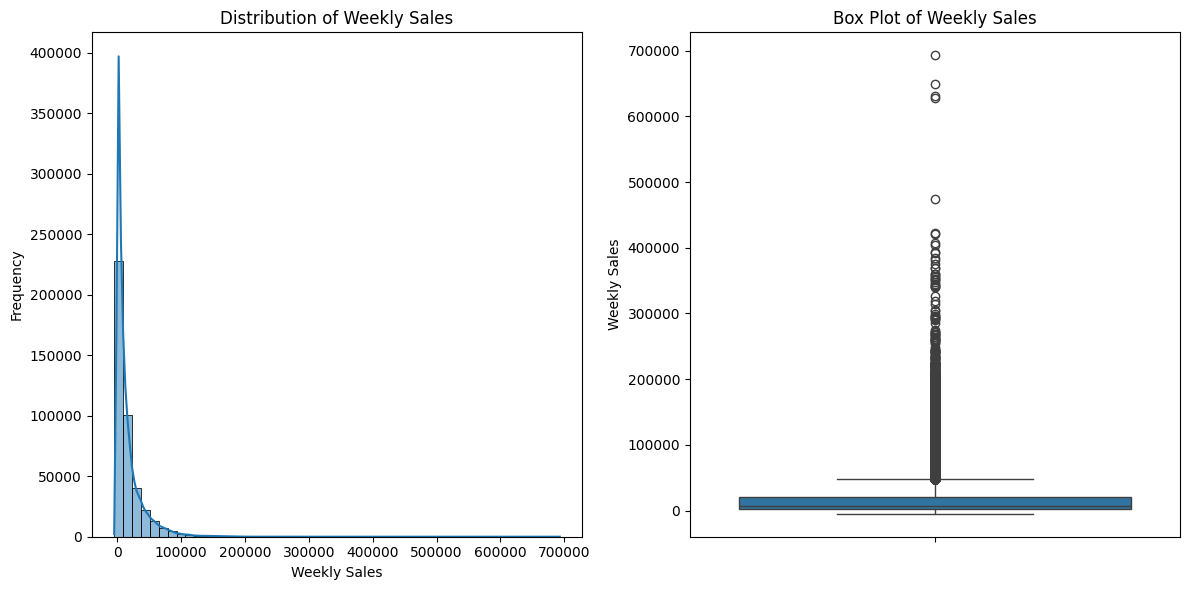

In [182]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the relationship between 'Weekly_Sales' and 'Size' using a scatter plot and calculate the correlation coefficient between these two variables.



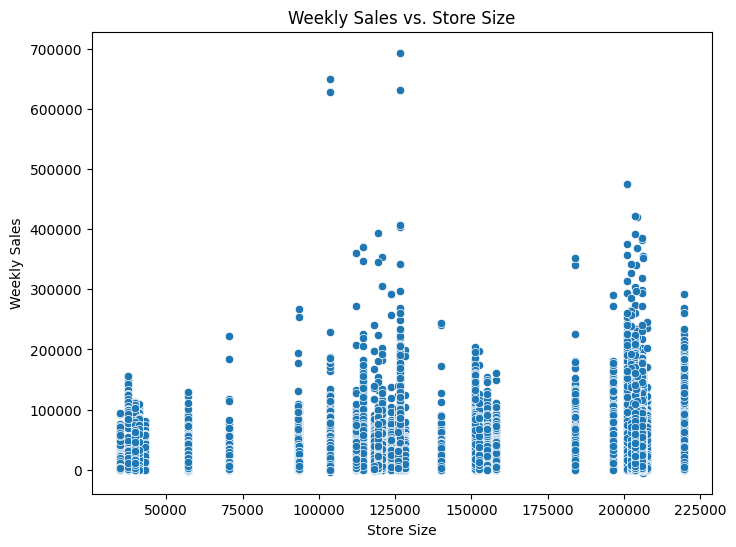

Correlation between Store Size and Weekly Sales: 0.24385615248893935


In [183]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Size', y='Weekly_Sales')
plt.title('Weekly Sales vs. Store Size')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

correlation_size_sales = merged_data['Size'].corr(merged_data['Weekly_Sales'])
print(f"Correlation between Store Size and Weekly Sales: {correlation_size_sales}")

### Distribution of Numerical Features
We will visualize the distributions of numerical features such as Temperature, Fuel_Price, CPI, Unemployment, and MarkDown values using histograms to understand their ranges and frequencies.

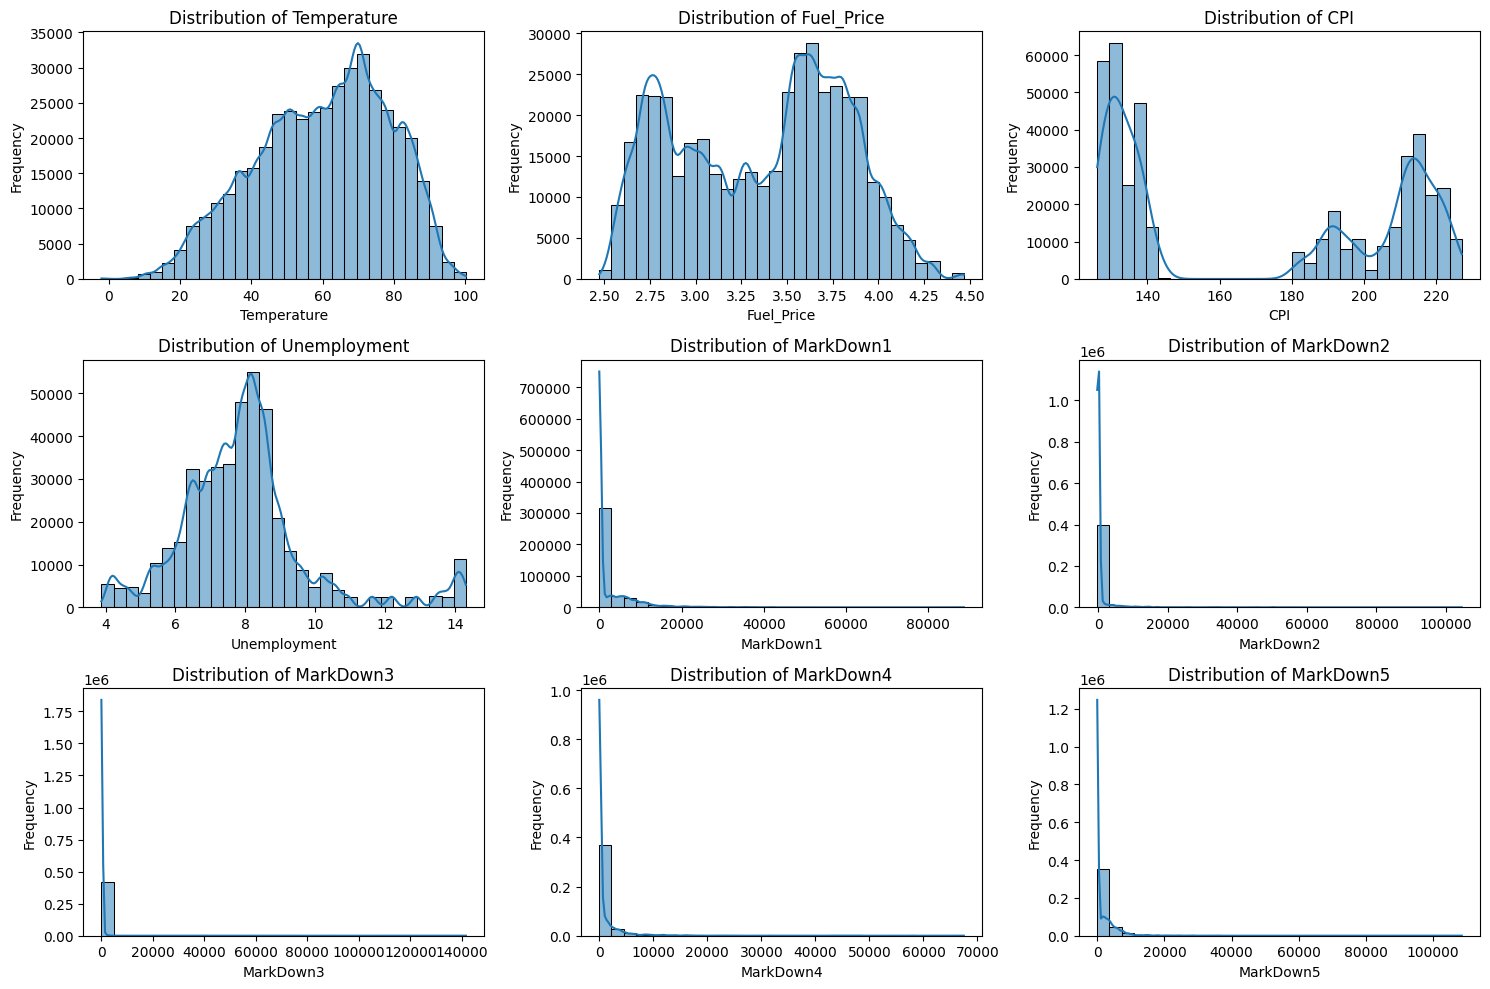

In [184]:
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(merged_data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Analysis
We will analyze the correlations between numerical features and Weekly Sales using a heatmap to identify potential linear relationships.

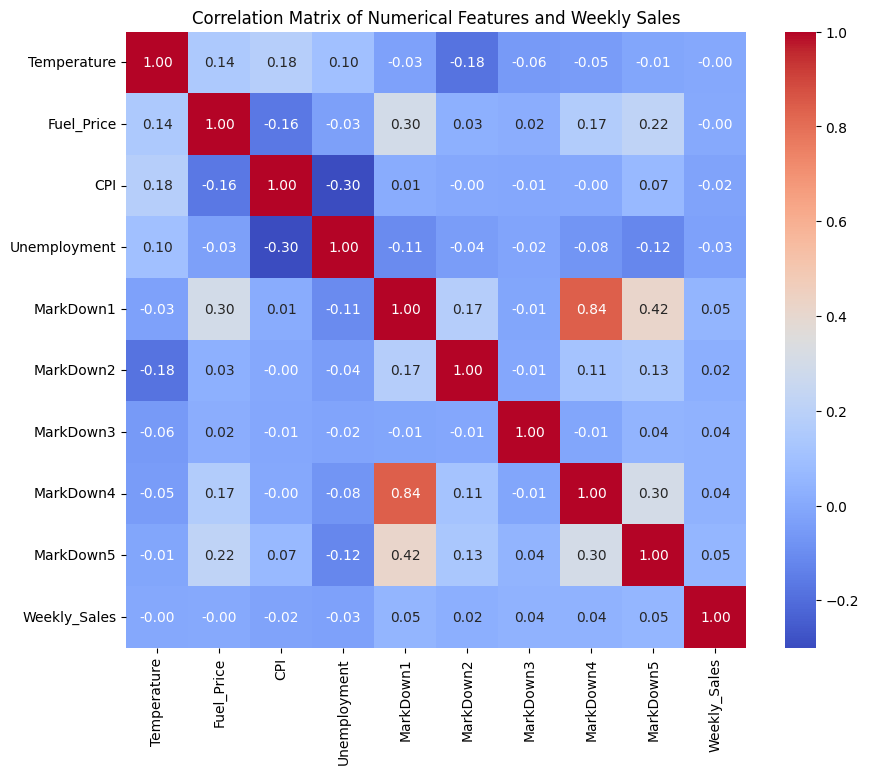

In [185]:
numerical_features_with_sales = numerical_features + ['Weekly_Sales']
correlation_matrix = merged_data[numerical_features_with_sales].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Weekly Sales')
plt.show()

### Relationship between Weekly Sales and Total Markdown
We will investigate the relationship between Weekly Sales and the total markdown across all markdown categories.

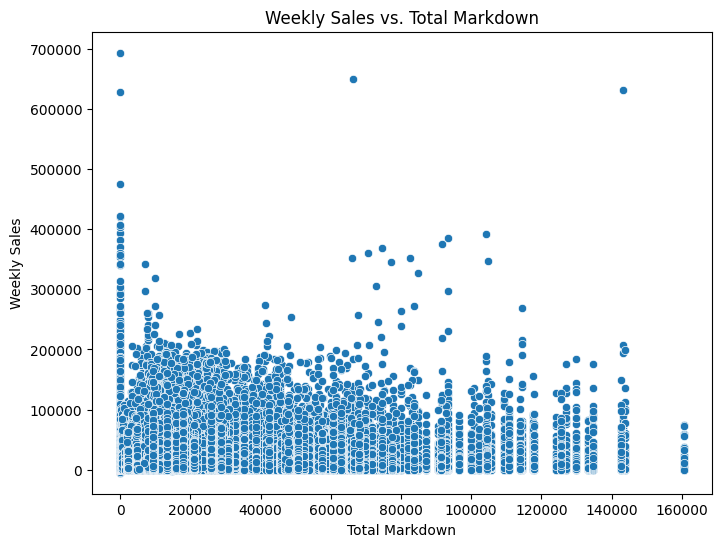

Correlation between Total Markdown and Weekly Sales: 0.06521855381234412


In [186]:
merged_data['Total_Markdown'] = merged_data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis = 1)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Total_Markdown', y='Weekly_Sales')
plt.title('Weekly Sales vs. Total Markdown')
plt.xlabel('Total Markdown')
plt.ylabel('Weekly Sales')
plt.show()

correlation_markdown_sales = merged_data['Total_Markdown'].corr(merged_data['Weekly_Sales'])
print(f"Correlation between Total Markdown and Weekly Sales: {correlation_markdown_sales}")

### Total Weekly Sales by Department
We will analyze the total weekly sales for each department to understand which departments contribute the most to overall sales.

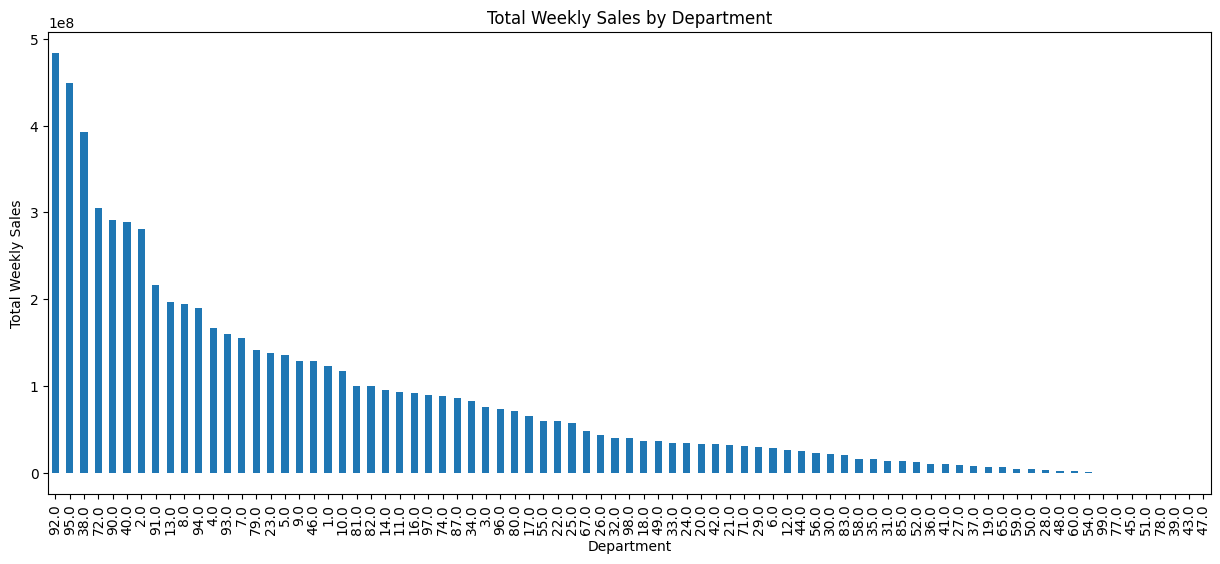

In [187]:
weekly_sales_by_dept = merged_data.groupby(by = 'Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (15,6))
weekly_sales_by_dept.plot(kind = 'bar')
plt.title('Total Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.show()

### Relationship between Weekly Sales and External Factors
We will explore the relationships between Weekly Sales and external factors such as Temperature, Fuel Price, CPI, and Unemployment using scatter plots.

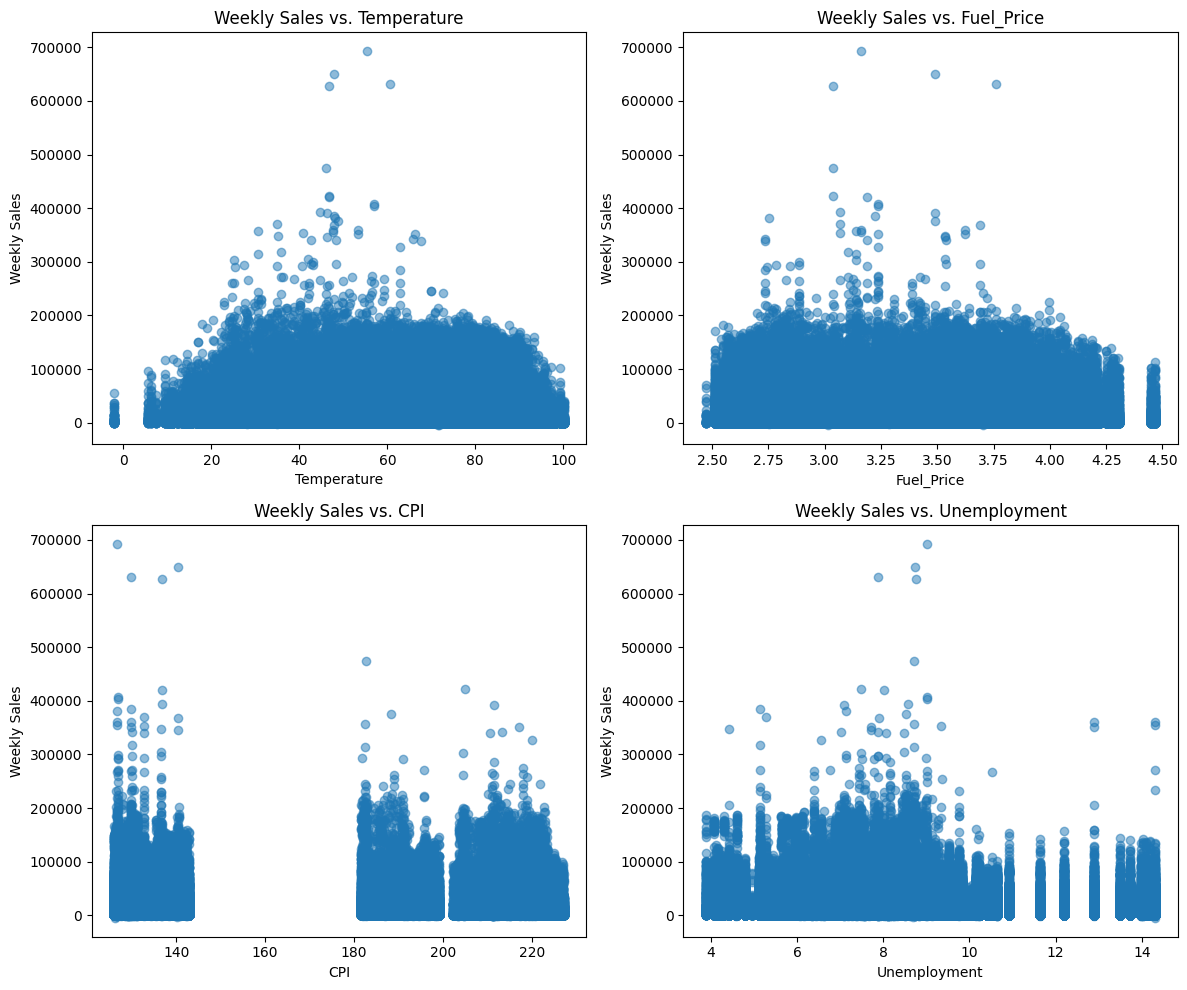

In [188]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
axs = axs.flatten()

features_to_plot = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for i, feature in enumerate(features_to_plot):
    axs[i].scatter(merged_data[feature], merged_data['Weekly_Sales'], alpha = 0.5)
    axs[i].set_title(f'Weekly Sales vs. {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

### Summary of Exploratory Data Analysis (EDA)

The EDA revealed several key characteristics and relationships within the Walmart sales data:

*   **Weekly Sales Distribution:** The distribution of weekly sales is right-skewed, with a concentration of sales at lower values and a presence of outliers with very high sales figures.
*   **Store Size and Sales:** There is a positive correlation between store size and weekly sales, indicating that larger stores generally have higher sales.
*   **Numerical Feature Distributions:** The distributions of numerical features like Temperature, Fuel Price, CPI, and Unemployment vary. The Markdown features (MarkDown1-5) show a large number of zero values, suggesting these promotions were not consistently applied.
*   **Correlation Matrix:** The correlation matrix showed relatively weak correlations between Weekly Sales and most individual numerical features, including Temperature, Fuel Price, CPI, and Unemployment. The Markdown features show some positive correlation with Weekly Sales, particularly MarkDown1, MarkDown4, and MarkDown5. There are also strong positive correlations among the Markdown features themselves.
*   **Total Markdown and Sales:** The total markdown has a weak positive correlation with Weekly Sales, suggesting that while markdowns might contribute to sales, the relationship is not strong or direct across all instances.
*   **Departmental Sales Contribution:** The analysis of total weekly sales by department highlighted significant variations, with a few departments (e.g., 92, 95, 38, 72) contributing a disproportionately large amount to overall sales.
*   **External Factors and Sales:** Scatter plots showed no clear strong linear relationships between Weekly Sales and Temperature, Fuel Price, CPI, or Unemployment across all stores and departments.

## **3. Sales Trends and Patterns**

This section analyzes sales trends over time and across different dimensions, as well as the impact of holidays and other external factors on sales.

### Total Weekly Sales Over Time

In [189]:
# 1. Calculate the total weekly sales over time
total_weekly_sales_over_time = merged_data.groupby(by = 'Date')['Weekly_Sales'].sum().reset_index()

print("Total Weekly Sales Over Time:")
display(total_weekly_sales_over_time.head())

Total Weekly Sales Over Time:


,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


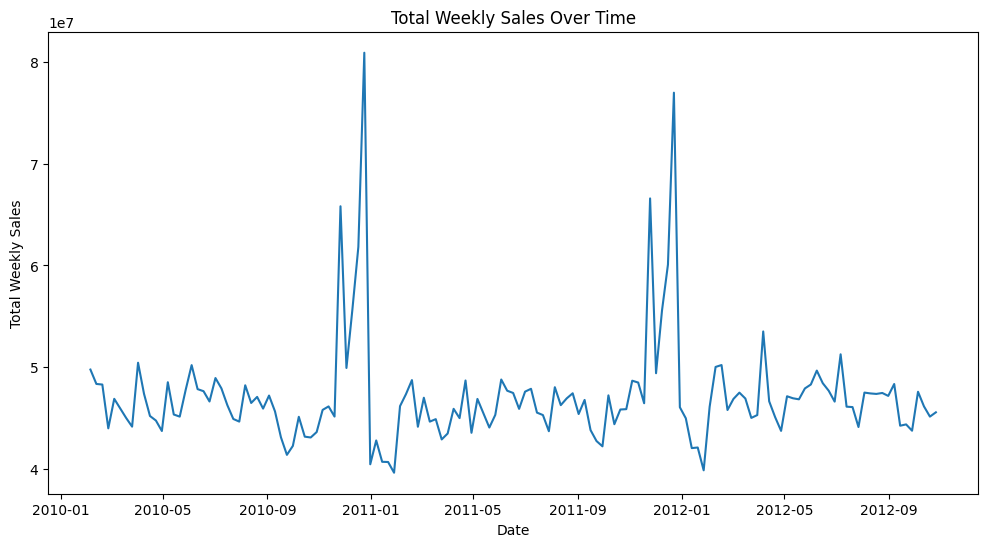

In [190]:
plt.figure(figsize = (12, 6))
plt.plot(total_weekly_sales_over_time['Date'], total_weekly_sales_over_time['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

### Average Weekly Sales by Store Type Over Time

In [191]:
# 2. Calculate the average weekly sales for each store over time
average_weekly_sales_by_store_over_time = merged_data.groupby(by = ['Store', 'Date'])['Weekly_Sales'].mean().reset_index()

# 3. Calculate the average weekly sales for each department over time
average_weekly_sales_by_department_over_time = merged_data.groupby(by = ['Dept', 'Date'])['Weekly_Sales'].mean().reset_index()

# 4. Calculate the average weekly sales for each store type over time
average_weekly_sales_by_type_over_time = merged_data.groupby(by = ['Type', 'Date'])['Weekly_Sales'].mean().reset_index()

print("\nAverage Weekly Sales by Store Over Time:")
display(average_weekly_sales_by_store_over_time.head())
print("\nAverage Weekly Sales by Department Over Time:")
display(average_weekly_sales_by_department_over_time.head())
print("\nAverage Weekly Sales by Type Over Time:")
display(average_weekly_sales_by_type_over_time.head())


Average Weekly Sales by Store Over Time:


,Store,Date,Weekly_Sales
0,1,2010-02-05,22516.313699
1,1,2010-02-12,22804.964444
2,1,2010-02-19,22081.755753
3,1,2010-02-26,19579.549861
4,1,2010-03-05,21298.721644



Average Weekly Sales by Department Over Time:


,Dept,Date,Weekly_Sales
0,1.0,2010-02-05,19596.298000
1,1.0,2010-02-12,32381.831111
2,1.0,2010-02-19,24850.163556
3,1.0,2010-02-26,15142.035111
4,1.0,2010-03-05,16947.834889



Average Weekly Sales by Type Over Time:


,Type,Date,Weekly_Sales
0,A,2010-02-05,21287.500828
1,A,2010-02-12,20491.118247
2,A,2010-02-19,20408.211165
3,A,2010-02-26,18623.002653
4,A,2010-03-05,19881.154702


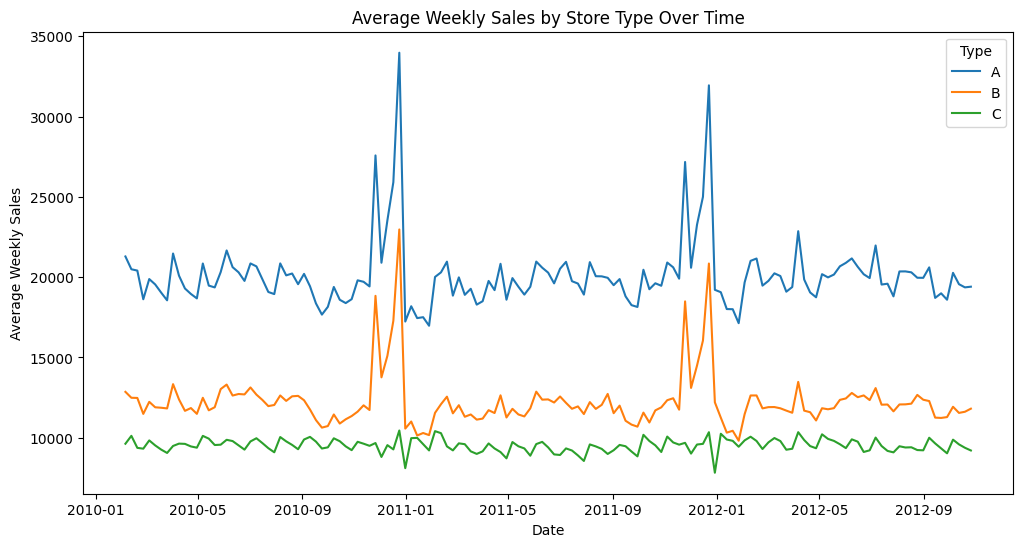

In [192]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_weekly_sales_by_type_over_time, x='Date', y='Weekly_Sales', hue='Type')
plt.title('Average Weekly Sales by Store Type Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

### Sales Trends by Top Departments Over Time

We will visualize the weekly sales trends for the top-performing departments over time to identify their seasonal patterns and overall performance.

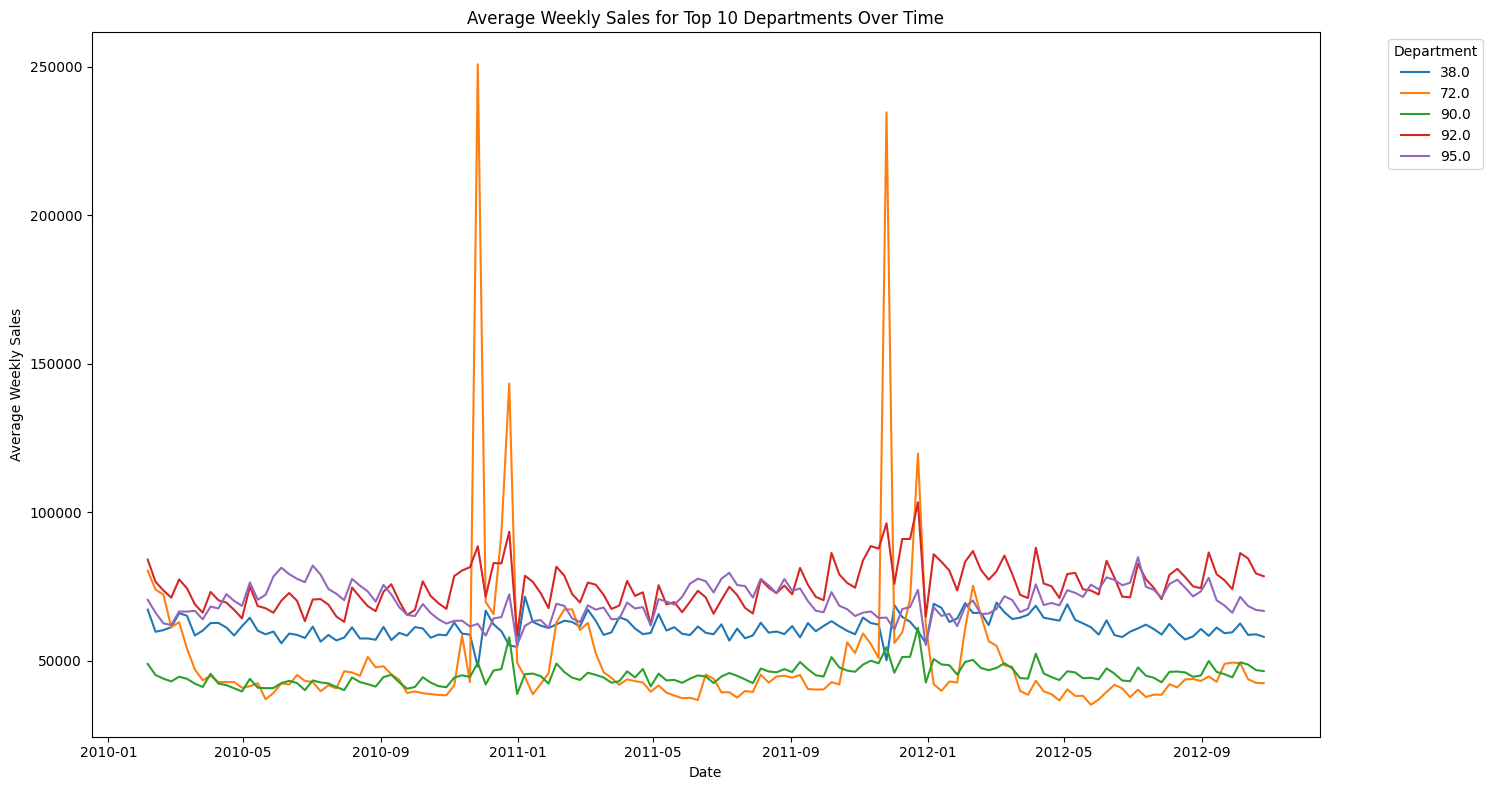

In [193]:
# Get the top 10 departments by total weekly sales
top_10_departments = weekly_sales_by_dept.head(5).index.tolist()

# Filter the average weekly sales by department over time to include only the top 10 departments
average_weekly_sales_top_depts = average_weekly_sales_by_department_over_time[
    average_weekly_sales_by_department_over_time['Dept'].isin(top_10_departments)
]

plt.figure(figsize=(15, 8))
sns.lineplot(data=average_weekly_sales_top_depts, x='Date', y='Weekly_Sales', hue='Dept', palette='tab10')
plt.title('Average Weekly Sales for Top 10 Departments Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Total Weekly Sales: Holiday vs. Non-Holiday

### Key Findings and Actionable Insights

Based on the analysis of Walmart sales data, the following key findings were observed and actionable insights are recommended:

In [194]:
# Trim merged_data to include data only up to 2011-12-31
merged_data= merged_data[merged_data.index <= '2011-12-31']

In [195]:
# 5. Calculate the total weekly sales during holidays and non-holidays
total_sales_by_holiday = merged_data.groupby(by = 'IsHoliday')['Weekly_Sales'].sum().reset_index()

print("\nTotal Sales by Holiday:")
display(total_sales_by_holiday)


Total Sales by Holiday:


,IsHoliday,Weekly_Sales
0,False,4.330126e+09
1,True,4.069601e+08


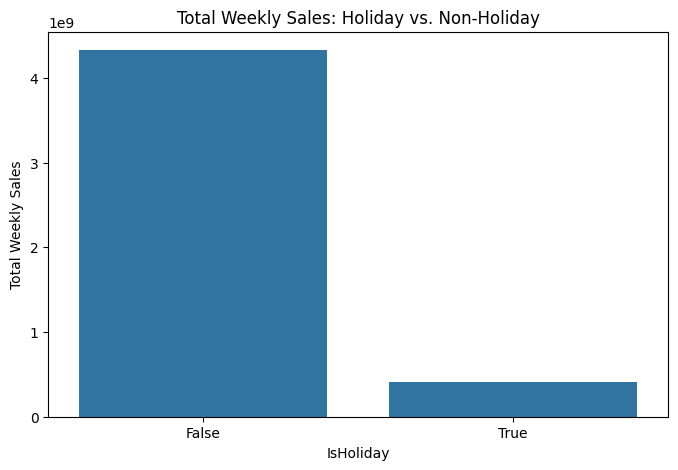

In [196]:
plt.figure(figsize=(8, 5))
sns.barplot(data=total_sales_by_holiday, x='IsHoliday', y='Weekly_Sales')
plt.title('Total Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Total Weekly Sales')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

### Average Weekly Sales: Black Friday, Pre-Christmas, and by Type/Holiday

In [197]:
# 6. Calculate the average weekly sales during Black Friday and non-Black Friday periods
average_sales_by_black_friday = merged_data.groupby(by = 'Black_Friday')['Weekly_Sales'].mean().reset_index()

# 7. Calculate the average weekly sales during Pre-Christmas and non-Pre-Christmas periods
average_sales_by_pre_christmas = merged_data.groupby(by = 'Pre_Christmas')['Weekly_Sales'].mean().reset_index()

# 8. Calculate the average weekly sales by store type and holiday status
average_sales_by_type_and_holiday = merged_data.groupby(by = ['Type', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

print("\nAverage Sales by Black Friday:")
display(average_sales_by_black_friday)
print("\nAverage Sales by Pre-Christmas:")
display(average_sales_by_pre_christmas)
print("\nAverage Sales by Type and Holiday:")
display(average_sales_by_type_and_holiday)


Average Sales by Black Friday:


,Black_Friday,Weekly_Sales
0,Black_Friday_no,15981.894638
1,Black_Friday_yes,22220.944538



Average Sales by Pre-Christmas:


,Pre_Christmas,Weekly_Sales
0,Pre_Christmas_no,15894.605845
1,Pre_Christmas_yes,26400.811921



Average Sales by Type and Holiday:


,Type,IsHoliday,Weekly_Sales
0,A,False,20112.962859
1,A,True,21419.458066
2,B,False,12291.799205
3,B,True,13571.723741
4,C,False,9491.853368
5,C,True,9401.352739


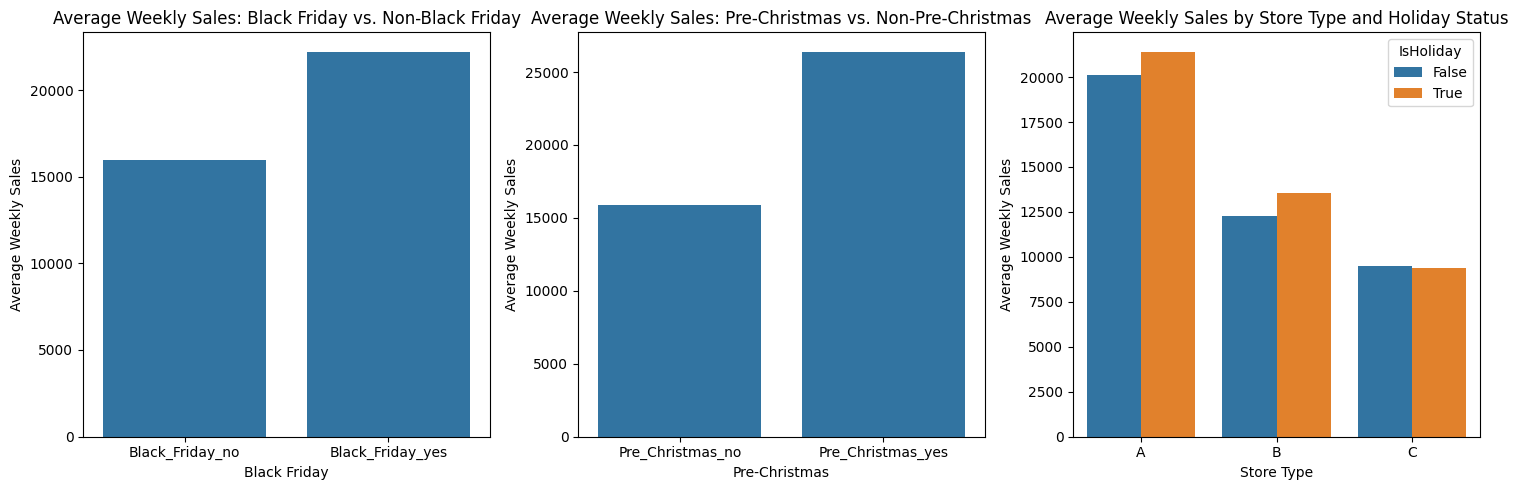

In [198]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=average_sales_by_black_friday, x='Black_Friday', y='Weekly_Sales')
plt.title('Average Weekly Sales: Black Friday vs. Non-Black Friday')
plt.xlabel('Black Friday')
plt.ylabel('Average Weekly Sales')


plt.subplot(1, 3, 2)
sns.barplot(data=average_sales_by_pre_christmas, x='Pre_Christmas', y='Weekly_Sales')
plt.title('Average Weekly Sales: Pre-Christmas vs. Non-Pre-Christmas')
plt.xlabel('Pre-Christmas')
plt.ylabel('Average Weekly Sales')

plt.subplot(1, 3, 3)
sns.barplot(data=average_sales_by_type_and_holiday, x='Type', y='Weekly_Sales', hue='IsHoliday')
plt.title('Average Weekly Sales by Store Type and Holiday Status')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')


plt.tight_layout()
plt.show()

### Sales Trends and Patterns Analysis

Analysis of sales trends over time and across different dimensions revealed the following patterns:

*   **Overall Weekly Sales Trend:** Total weekly sales show noticeable fluctuations over time, with clear seasonal peaks and dips.
*   **Store Type Trends:** Average weekly sales vary significantly by store type, with Type A stores consistently having the highest average sales, followed by Type B, and then Type C. The sales trends over time also differ across store types.
*   **Holiday Impact:** Holidays have a significant positive impact on weekly sales. Total sales during holiday weeks are considerably higher than during non-holiday weeks. Specifically, Black Friday and Pre-Christmas periods show substantial increases in average weekly sales compared to non-holiday periods. The impact of holidays also varies by store type, with Type A and B stores showing a more pronounced increase in average weekly sales during holidays than Type C stores.
*   **Departmental Monthly Trends:** The top-performing departments exhibit distinct monthly sales patterns, indicating seasonality in demand for products within these departments. This suggests that sales for these key departments fluctuate throughout the year.

## **4. Comprehensive Summary**

**Key Findings:**

*   The distribution of Weekly Sales is right-skewed with a significant presence of outliers, indicating a concentration of sales at lower values but also instances of very high sales.
*   There is a positive correlation between store size and Weekly Sales, suggesting that larger stores tend to generate higher sales volumes (correlation coefficient: ~0.25).
*   Holidays, particularly Black Friday and Pre-Christmas, have a significant positive impact on weekly sales, with higher total and average sales observed during these periods compared to non-holiday weeks. The impact of holidays varies by store type, with Type A and B stores showing a more pronounced increase than Type C.
*   Store Type A consistently demonstrates the highest average weekly sales, followed by Type B, and then Type C. The sales trends over time also differ across store types.
*   Certain departments (e.g., 92, 95, 38, 72) contribute a disproportionately large amount to overall weekly sales.
*   Individual numerical features like Temperature, Fuel Price, CPI, and Unemployment show weak linear relationships with Weekly Sales.

**Actionable Insights:**

*   **Leverage Holiday Peaks:** Strategically plan for holiday seasons (Black Friday, Pre-Christmas) with increased inventory, optimized staffing, and targeted promotions to capitalize on higher sales.
*   **Tailor Strategies by Store Type:** Implement store-type specific strategies, adapting successful approaches from Type A stores to Type B and C, and tailoring marketing, inventory, and operations to each type's unique needs.
*   **Focus on High-Performing Departments:** Invest in top departments by ensuring adequate stock, optimizing product placement, and aligning inventory and promotions with their seasonal trends.
*   **Strategic Consideration of Store Size:** Prioritize larger store sizes for new locations and explore optimization or expansion for smaller stores to maximize sales potential.